# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=10_000
size1=20_000_000
size2=40_000_000
batch1=1
batch2=1_000
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include randomness in the state transitions (e.g., maternity leave)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic False

include_putki None
step 0.25

train...
phase 1




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...






----------------------------------
| explained_variance | -0.000888 |
| fps                | 1647      |
| nupdates           | 1         |
| policy_entropy     | 1.39      |
| policy_loss        | 54        |
| total_timesteps    | 0         |
| value_loss         | 1.62e+03  |
----------------------------------
---------------------------------
|

---------------------------------
| explained_variance | 0.907    |
| fps                | 2100     |
| nupdates           | 6000     |
| policy_entropy     | 0.391    |
| policy_loss        | 0.0465   |
| total_timesteps    | 14763539 |
| value_loss         | 6.67     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2093     |
| nupdates           | 7000     |
| policy_entropy     | 0.348    |
| policy_loss        | 0.15     |
| total_timesteps    | 17224539 |
| value_loss         | 2.16     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2060     |
| nupdates           | 8000     |
| policy_entropy     | 0.449    |
| policy_loss        | 0.253    |
| total_timesteps    | 19685539 |
| value_loss         | 3.28     |
---------------------------------
done
phase 2
init vecmonitor:  tmp/monitor.csv
training...
-----------------------

3719304 timesteps 18504 episodes
Best mean reward: 220.99 - Last mean reward per episode: 220.87
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 220.96121 |
| explained_variance | 0.826     |
| fps                | 3226      |
| nupdates           | 18        |
| policy_entropy     | 0.585     |
| policy_loss        | -3.97     |
| total_timesteps    | 3512897   |
| value_loss         | 62.1      |
----------------------------------
3924324 timesteps 19524 episodes
Best mean reward: 220.99 - Last mean reward per episode: 220.86
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 221.37407 |
| explained_variance | 0.834     |
| fps                | 3226      |
| nupdates           | 19        |
| policy_entropy     | 0.583     |
| policy_loss        | -3.79     |
| total_timesteps    | 3719538   |
| value_loss         | 56.2      |
----------------------------------
4131756 timesteps 20556 episodes
Bes

7231176 timesteps 35976 episodes
Best mean reward: 220.99 - Last mean reward per episode: 220.71
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 218.16473 |
| explained_variance | 0.859     |
| fps                | 3223      |
| nupdates           | 35        |
| policy_entropy     | 0.578     |
| policy_loss        | -0.0638   |
| total_timesteps    | 7025794   |
| value_loss         | 11.8      |
----------------------------------
7438608 timesteps 37008 episodes
Best mean reward: 220.99 - Last mean reward per episode: 220.63
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 214.95845 |
| explained_variance | 0.855     |
| fps                | 3223      |
| nupdates           | 36        |
| policy_entropy     | 0.577     |
| policy_loss        | 0.214     |
| total_timesteps    | 7232435   |
| value_loss         | 12.5      |
----------------------------------
7643628 timesteps 38028 episodes
Bes

10743048 timesteps 53448 episodes
Best mean reward: 221.32 - Last mean reward per episode: 221.07
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 221.8459 |
| explained_variance | 0.846    |
| fps                | 3220     |
| nupdates           | 52       |
| policy_entropy     | 0.525    |
| policy_loss        | 0.693    |
| total_timesteps    | 10538691 |
| value_loss         | 14.3     |
---------------------------------
10950480 timesteps 54480 episodes
Best mean reward: 221.32 - Last mean reward per episode: 221.13
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 226.5495 |
| explained_variance | 0.842    |
| fps                | 3220     |
| nupdates           | 53       |
| policy_entropy     | 0.516    |
| policy_loss        | 0.469    |
| total_timesteps    | 10745332 |
| value_loss         | 14.5     |
---------------------------------
11157912 timesteps 55512 episodes
Best mean reward: 221.

14464764 timesteps 71964 episodes
Best mean reward: 221.32 - Last mean reward per episode: 221.16
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.54413 |
| explained_variance | 0.844     |
| fps                | 3220      |
| nupdates           | 70        |
| policy_entropy     | 0.499     |
| policy_loss        | -0.491    |
| total_timesteps    | 14258229  |
| value_loss         | 14.4      |
----------------------------------
14669784 timesteps 72984 episodes
Best mean reward: 221.32 - Last mean reward per episode: 221.12
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 222.3134 |
| explained_variance | 0.845    |
| fps                | 3220     |
| nupdates           | 71       |
| policy_entropy     | 0.499    |
| policy_loss        | -0.384   |
| total_timesteps    | 14464870 |
| value_loss         | 13.5     |
---------------------------------
14877216 timesteps 74016 episodes
Best mean r

17976636 timesteps 89436 episodes
Best mean reward: 221.56 - Last mean reward per episode: 220.99
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.33798 |
| explained_variance | 0.848     |
| fps                | 3220      |
| nupdates           | 87        |
| policy_entropy     | 0.496     |
| policy_loss        | 0.319     |
| total_timesteps    | 17771126  |
| value_loss         | 13        |
----------------------------------
18184068 timesteps 90468 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.11
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 226.02525 |
| explained_variance | 0.85      |
| fps                | 3220      |
| nupdates           | 88        |
| policy_entropy     | 0.505     |
| policy_loss        | 0.242     |
| total_timesteps    | 17977767  |
| value_loss         | 13        |
----------------------------------
18389088 timesteps 91488 episodes


21488508 timesteps 106908 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.13
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 224.74188 |
| explained_variance | 0.849     |
| fps                | 3221      |
| nupdates           | 104       |
| policy_entropy     | 0.507     |
| policy_loss        | -0.112    |
| total_timesteps    | 21284023  |
| value_loss         | 11.8      |
----------------------------------
21695940 timesteps 107940 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.13
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 220.05296 |
| explained_variance | 0.853     |
| fps                | 3221      |
| nupdates           | 105       |
| policy_entropy     | 0.517     |
| policy_loss        | -0.0602   |
| total_timesteps    | 21490664  |
| value_loss         | 11.8      |
----------------------------------
21903372 timesteps 108972 episod

25207812 timesteps 125412 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.18
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 223.75961 |
| explained_variance | 0.857     |
| fps                | 3221      |
| nupdates           | 122       |
| policy_entropy     | 0.52      |
| policy_loss        | -0.0905   |
| total_timesteps    | 25003561  |
| value_loss         | 11.4      |
----------------------------------
25415244 timesteps 126444 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.26
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 223.01668 |
| explained_variance | 0.843     |
| fps                | 3221      |
| nupdates           | 123       |
| policy_entropy     | 0.514     |
| policy_loss        | -0.198    |
| total_timesteps    | 25210202  |
| value_loss         | 13.1      |
----------------------------------
25622676 timesteps 127476 episod

28722096 timesteps 142896 episodes
Best mean reward: 221.56 - Last mean reward per episode: 220.65
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 217.0017 |
| explained_variance | 0.848    |
| fps                | 3220     |
| nupdates           | 139      |
| policy_entropy     | 0.53     |
| policy_loss        | 0.168    |
| total_timesteps    | 28516458 |
| value_loss         | 12.7     |
---------------------------------
28929528 timesteps 143928 episodes
Best mean reward: 221.56 - Last mean reward per episode: 220.59
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 220.0369 |
| explained_variance | 0.844    |
| fps                | 3221     |
| nupdates           | 140      |
| policy_entropy     | 0.531    |
| policy_loss        | 0.171    |
| total_timesteps    | 28723099 |
| value_loss         | 13.3     |
---------------------------------
29134548 timesteps 144948 episodes
Best mean reward: 2

32441400 timesteps 161400 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.04
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 222.35219 |
| explained_variance | 0.851     |
| fps                | 3221      |
| nupdates           | 157       |
| policy_entropy     | 0.541     |
| policy_loss        | -0.139    |
| total_timesteps    | 32235996  |
| value_loss         | 12.6      |
----------------------------------
32648832 timesteps 162432 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.23
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 222.25871 |
| explained_variance | 0.847     |
| fps                | 3221      |
| nupdates           | 158       |
| policy_entropy     | 0.532     |
| policy_loss        | -0.0761   |
| total_timesteps    | 32442637  |
| value_loss         | 11.9      |
----------------------------------
32853852 timesteps 163452 episod

35953272 timesteps 178872 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.23
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 222.07455 |
| explained_variance | 0.853     |
| fps                | 3221      |
| nupdates           | 174       |
| policy_entropy     | 0.514     |
| policy_loss        | -0.0188   |
| total_timesteps    | 35748893  |
| value_loss         | 11.8      |
----------------------------------
36160704 timesteps 179904 episodes
Best mean reward: 221.56 - Last mean reward per episode: 221.12
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 221.5999 |
| explained_variance | 0.854    |
| fps                | 3221     |
| nupdates           | 175      |
| policy_entropy     | 0.524    |
| policy_loss        | -0.0642  |
| total_timesteps    | 35955534 |
| value_loss         | 12.1     |
---------------------------------
36368136 timesteps 180936 episodes
Best mea

39467556 timesteps 196356 episodes
Best mean reward: 221.56 - Last mean reward per episode: 220.96
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 223.00226 |
| explained_variance | 0.845     |
| fps                | 3221      |
| nupdates           | 191       |
| policy_entropy     | 0.515     |
| policy_loss        | 0.0194    |
| total_timesteps    | 39261790  |
| value_loss         | 12.3      |
----------------------------------
39672576 timesteps 197376 episodes
Best mean reward: 221.56 - Last mean reward per episode: 220.97
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 220.72623 |
| explained_variance | 0.849     |
| fps                | 3221      |
| nupdates           | 192       |
| policy_entropy     | 0.514     |
| policy_loss        | -0.0481   |
| total_timesteps    | 39468431  |
| value_loss         | 12.8      |
----------------------------------
39880008 timesteps 198408 episod

0.7381719610908263
20 70 (205,)


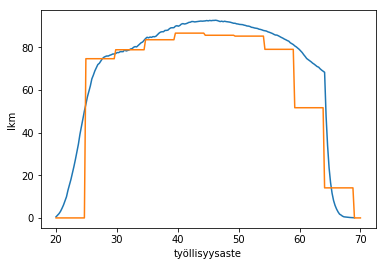

best_emp 0
Vaikutus työllisyyteen keskiarvo 2251168.0 htv, mediaani 2251168.0 htv
                        keskiarvo 2354460.0 työllistä, mediaani 2354460.0 työllistä


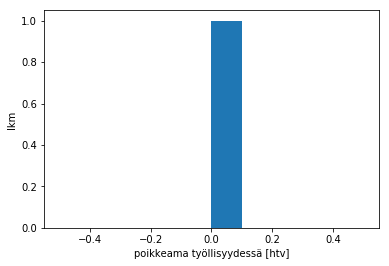

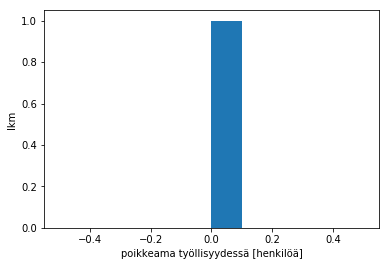

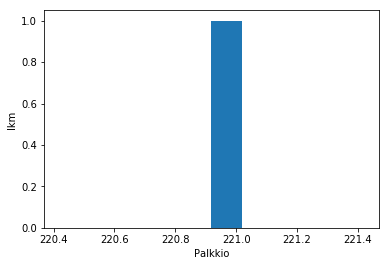

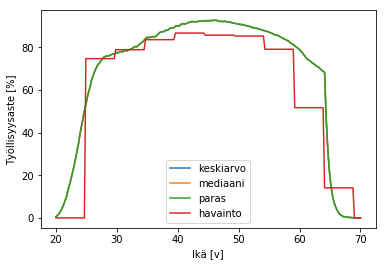

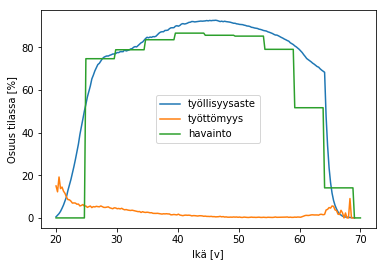

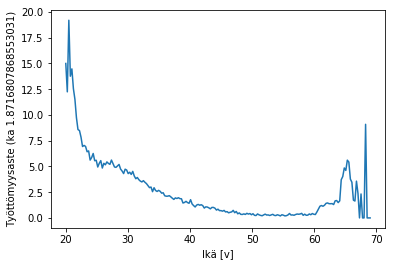

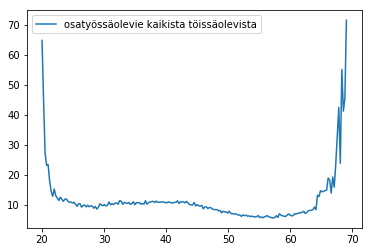

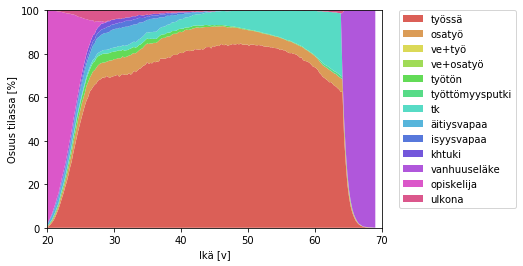

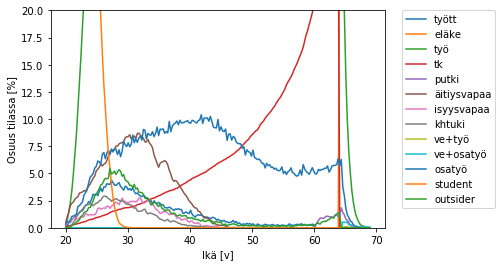

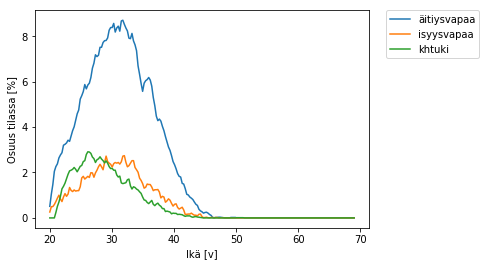

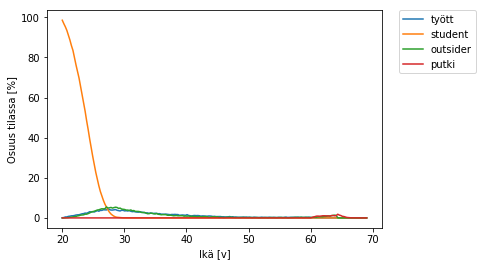

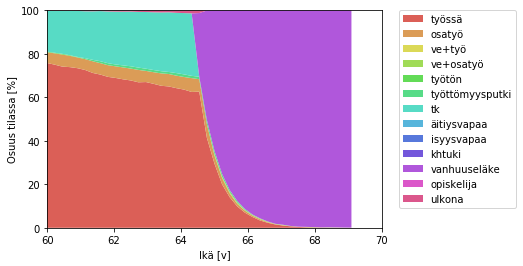

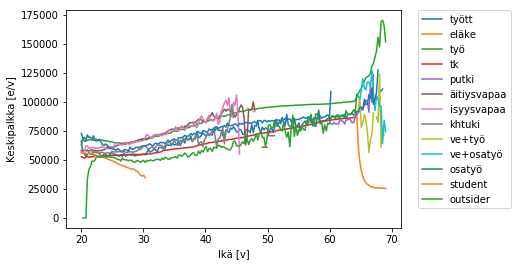

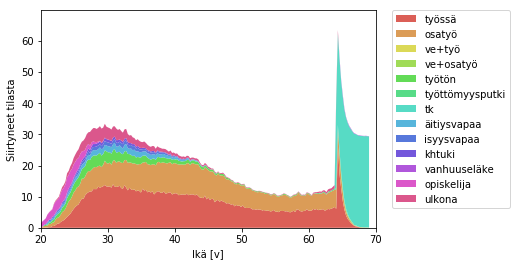

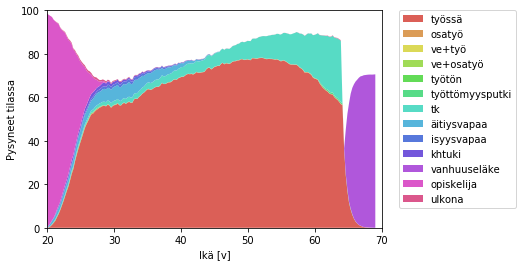

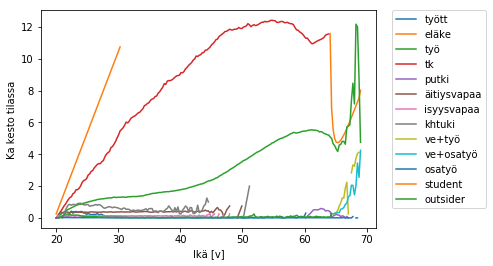

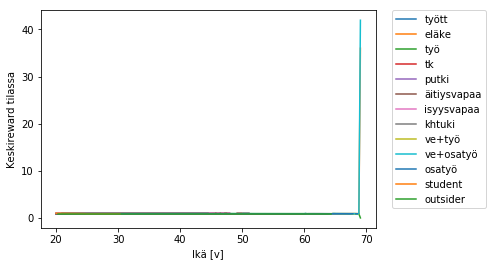

No handles with labels found to put in legend.


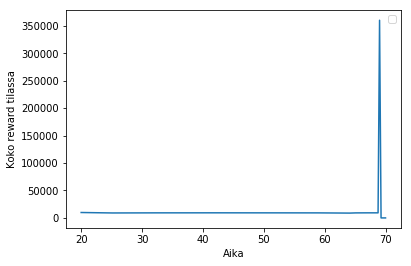

Yhteensä reward 220.91885024939822


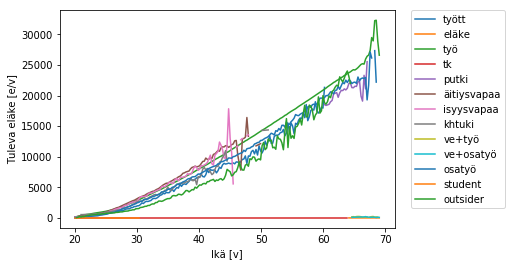

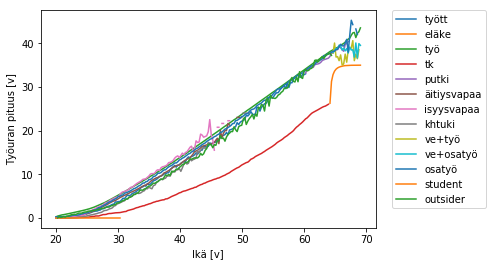

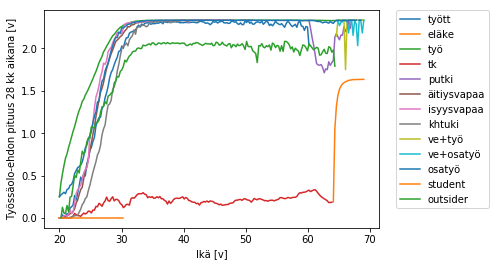

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              deterministic=deterministic,randomness=randomness)

cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_perus',
                plot=True,save='saved/perusmalli',cont=False,start_from='best/best_perus',
                results='results/perus_res_')
cc1.render(load='results/perus_res__best')

# Porrastettu työttömyysturva



In [18]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_steps',plot=True,
                save='saved/malli_steps',results='results/steps_res_',start_from='best/best_steps')
cc2_porras.render(load='results/steps_res__best')


No mortality included
train...
phase 1


KeyboardInterrupt: 

No mortality included
No mortality included


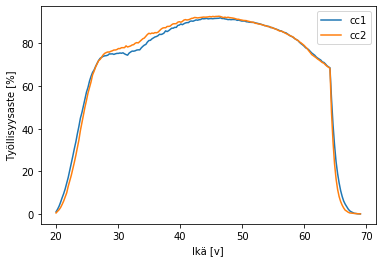

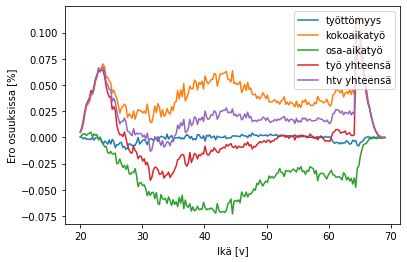

Työllisyysvaikutus 30-63-vuotiaisiin noin 32558.0 htv ja -25200.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -3.4181866519811255 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.057261467810135774
[[9.000e-03 1.800e-02 0.000e+00 ... 3.300e-02 0.000e+00 9.853e+00]
 [1.800e-02 7.100e-02 0.000e+00 ... 5.800e-02 1.000e-03 9.683e+00]
 [4.800e-02 1.470e-01 0.000e+00 ... 5.500e-02 4.000e-03 9.528e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]] [[1.100e-02 6.400e-02 0.000e+00 ... 3.800e-02 0.000e+00 9.800e+00]
 [1.700e-02 1.460e-01 0.000e+00 ... 7.700e-02 7.000e-03 9.575e+00]
 [3.400e-02 2.780e-01 0.000e+00 ... 9.000e-02 1.600e-02 9.328e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+

In [2]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              deterministic=deterministic,randomness=randomness)

#cc1.render(load='results/perus_res__best')
cc1.episodestats.load_sim('results/perus_res__best')
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
#cc2_porras.render(load='results/steps_res__best')
cc2_porras.episodestats.load_sim('results/steps_res__best')
cc2_porras.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2_porras.episodestats.empstate/cc2_porras.n_pop)


10000 1000


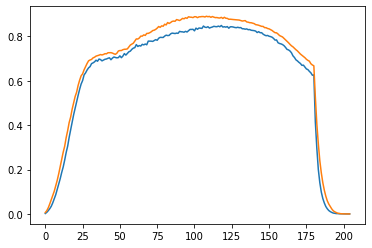

In [6]:
cc1.n_pop=10000
plt.plot(cc1.episodestats.empstate[:,1]/cc1.n_pop)
plt.plot(cc2_porras.episodestats.empstate[:,1]/cc2_porras.n_pop/10)
print(cc1.n_pop,cc2_porras.n_pop)

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [6]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_ek',plot=True,
                save='saved/malli_ek',results='results/ek_res_',start_from='best/best_ek')
cc2.render(load='results/ek_res__best')
cc2.load_sim(load='results/ek_res__best')

No mortality included
train...
phase 1
training...
---------------------------------
| explained_variance | 0.00631  |
| fps                | 1815     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 52.5     |
| total_timesteps    | 0        |
| value_loss         | 1.54e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.809    |
| fps                | 2294     |
| nupdates           | 1000     |
| policy_entropy     | 0.808    |
| policy_loss        | -0.512   |
| total_timesteps    | 2458539  |
| value_loss         | 12.2     |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 2306     |
| nupdates           | 2000     |
| policy_entropy     | 0.403    |
| policy_loss        | -0.1     |
| total_timesteps    | 4919539  |
| value_loss         | 4.11     |
---------------------------------
-------------------------------

KeyboardInterrupt: 

In [16]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

OSError: Unable to open file (unable to open file: name = 'results/ek_res__best', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_12kk',plot=True,
                    save='saved/malli_12',results='results/12kk_res_',start_from='best/best_12kk')
cc1_toe.render(load='results/12kk_res__best')

In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_50pv',plot=True,
                    save='saved/malli_ek',results='results/50pv_res_')
cc1_350.render(load='results/50pv_res__best')

In [ ]:
cc1_350.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_putki',
                      plot=True,save='saved/malli_putki',results='results/putki_res_')
cc1_350.render(load='results/putki_res__best')
cc1_putki.compare_with(cc1)                    

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_pt',plot=True,
                   save='saved/malli_pt',results='results/perustulo_res_')
cc1_pt.render(load='results/perustulo_res__best')

In [ ]:
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_300pv',plot=True,
                    save='saved/malli_300',results='results/300pv_res_')
cc1_400.render(load='results/300pv_res__best')
cc1_400.compare_with(cc1)